# Intro

Having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks.

In this chapter we will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it: 
- Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).
- Using an iterative optimization approach called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent that we will use again and again when we study neural networks in Part II: Batch GD, Mini-batch GD, and Stochastic GD.

Next we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set.

Finally, we will look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regression.

# Linear Regression

This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are the model’s parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term(also called the intercept term).

$$ \hat{y}=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\cdots+\theta_{n} x_{n}$$

- $ \hat{y}$ is the predicted value 
- $\text{n}$ is the number of features
- $x_i$ is the ith feature.
- $\theta_j$ is the jth model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, ⋯, \theta_n$.


This can be written much more concisely using a vectorized form, as below 

$$\hat{y}=h_{\boldsymbol{\theta}}(\mathbf{x})=\boldsymbol{\theta} \cdot \mathbf{x}$$
- $\theta$ is the model’s parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$. 

- $\text{x}$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta \cdot \text{x}$ is the dot product of the vectors θ and x, which is of course equal to $\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\cdots+\theta_{n} x_{n}$
- $h_\theta$ is the hypothesis function, using the model parameters $\theta$.

 We need a measure of how well (or poorly) the model fits the training data the most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, we need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root)
 
The MSE of a Linear Regression hypothesis $h_\theta$ on a training set $\text{X}$ is calculated using

$$ \operatorname{MSE}\left(\mathbf{X}, h_{\boldsymbol{\theta}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{\top} \mathbf{x}^{(i)}-y^{(i)}\right)^{2}$$

we write $h_\theta$ instead of just h to make it clear that the model is parametrized by the vector θ. To simplify notations, we will just write MSE($\theta$) instead of MSE(X, $h_\theta$).

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result directly. This is called the **Normal Equation**

$$\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{\boldsymbol{\top}} \mathbf{X}\right)^{-1} \mathbf{X}^{\boldsymbol{\top}} \mathbf{y}$$

- $\widehat{\boldsymbol{\theta}}$ is the value of $\theta$ that minimizes the cost function.

- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

Let’s generate some linear-looking data to test this equation

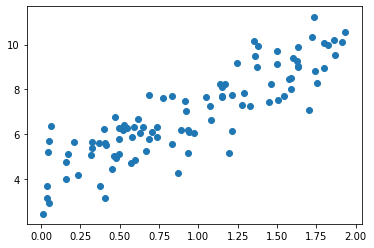

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)

Now let’s compute $\widehat{\boldsymbol{\theta}}$ using the Normal Equation. We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0186779 ],
       [3.06497619]])

The function that we used to generate the data is $y = 4 + 3x_1 + \text{Gaussian noise}$.

We would have hoped for $\theta_0 = 4 $and $\theta_1 = 3$ instead of $\theta_0 = 4.215$ and $\theta_1 = 2.770$. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now we can make predictions using $\widehat{\boldsymbol{\theta}}$

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0186779 ],
       [10.14863028]])

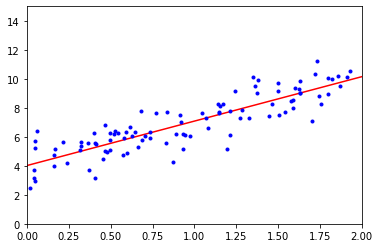

In [4]:
# Let’s plot this model’s predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])#This a cool way of initilizing the axis. 
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.0186779]), array([[3.06497619]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.0186779 ],
       [10.14863028]])

In [7]:
#The LinearRegression class is based on the scipy.linalg.lstsq() 
# function (the name stands for “least squares”), which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.0186779 ],
       [3.06497619]])

This function computes $\widehat{\boldsymbol{\theta}} =X^+y$, where $X^+$ is the pseudoinverse of X (specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.0186779 ],
       [3.06497619]])

The pseudoinverse itself is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \sum{ V^⊺}$ (see numpy.linalg.svd()). The pseudoinverse is computed as $X^+=V\sum^+U^⊺$. To compute the matrix $Σ^+$, the algorithm takes $\sum$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^⊺X$ is not invertible (i.e., singular), such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined.

# Computational Complexity
The Normal Equation computes the inverse of $X^⊺ X$, which is an $(n + 1) × (n + 1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4}$ = 5.3 to $2^3$ = 8.

The SVD approach used by Scikit-Learn’s LinearRegression class is about $O(n^2)$. If you double the number of features, you multiply the computation time by roughly 4.

- **Warning** : Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, both are linear with regard to the number of instances in the training set (they are O(m)), so they handle large training sets efficiently, provided they can fit in memory.

Also, once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.

Now we will look at a very different way to train a Linear Regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

# Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum

![Gradient Discent](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0403.png)

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

![Step Size](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0404.png)

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

![Diverge](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0405.png)

Finally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum difficult. Figure 4-6 shows the two main challenges with Gradient Descent. If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

![Local Min](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0406.png)

Fortunately, the MSE cost function for a Linear Regression model happens to be a [convex function](https://en.wikipedia.org/wiki/Convex_function), which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.

This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. The figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

![Cost function](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0407.png)

As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

- **Warning**: When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in 3 dimensions. Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.




# Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a partial derivative. It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). The equation below computes the partial derivative of the cost function with regard to parameter $\theta_j$, noted $\partial \text{MSE}(\theta) / \partial \theta_j$.


$$
\frac{\partial}{\partial \theta_{j}} \operatorname{MSE}(\boldsymbol{\theta})=\frac{2}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{\top} \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}
$$


Instead of computing these partial derivatives individually, you can use the below equation to compute them all in one go. The gradient vector, noted  $\nabla_\theta \text{MSE}(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter).

$$
\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})=\left(\begin{array}{c}
\frac{\partial}{\partial \theta_{0}} \operatorname{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_{1}} \operatorname{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_{n}} \operatorname{MSE}(\boldsymbol{\theta})
\end{array}\right)=\frac{2}{m} \mathbf{X}^{\boldsymbol{\top}}(\mathbf{X} \boldsymbol{\theta}-\mathbf{y})
$$

- **Warning**: Notice that this formula involves calculations over the full training set $X$, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_\theta \text{MSE}(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play multiply the gradient vector by $\eta$ to determine the size of the downhill step (seen below).

$$
\boldsymbol{\theta}^{(\mathrm{next} \mathrm{step})}=\boldsymbol{\theta}-\eta \nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})
$$

Let’s look at a quick implementation of this algorithm:



In [9]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #Literally the vector eqn but in python
    theta = theta - eta * gradients
    
theta

array([[4.0186779 ],
       [3.06497619]])

That’s exactly what the Normal Equation found! Gradient Descent worked perfectly. But what if you had used a different learning rate eta? The figure below shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

![Learning steps](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0408.png)

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.

- **CONVERGENCE RATE**: When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O(1/ϵ) iterations to reach the optimum within a range of ϵ, depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.


# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (Stochastic GD can be implemented as an out-of-core algorithm; see Chapter 1).

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). So once the algorithm stops, the final parameter values are good, but not optimal.

EG: 

![Stochastic Gradient Descent](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0409.png)

When the cost function is very irregular (as in the figure below), this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired from the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [10]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[3.96011744],
       [3.10716715]])

By convention we iterate by rounds of m iterations; each round is called an **epoch**. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution:

![SGD with a learning schedule](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0410.png)

Note that since instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this approach generally converges more slowly.

- **WARNING**: When using Stochastic Gradient Descent, the training instances must be [independent and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one). Lastly, it does not use any regularization (penalty=None; more details on this shortly):

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.9890406] [3.04825288]


As seen above, we find a solution quite close to the one returned by the Normal Equation. 

# Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with Stochastic GD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than Stochastic GD—but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression). Figure 4-11 shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

![Figure 4-11](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0411.png)

Let’s compare the algorithms we’ve discussed so far for Linear Regression6 (recall that m is the number of training instances and n is the number of features); see Table 4-1.


![Algos for LR](./AlgosForLR.png)

- **Note**: There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

# Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation (plus some noise;)



In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

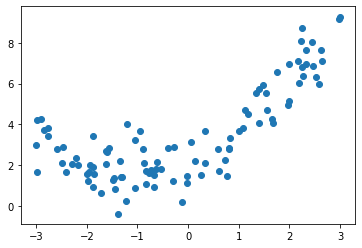

In [13]:
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):



In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.99521025])

In [15]:
X_poly[0]

array([2.99521025, 8.97128447])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data 

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.15133998] [[0.97990364 0.46283951]]


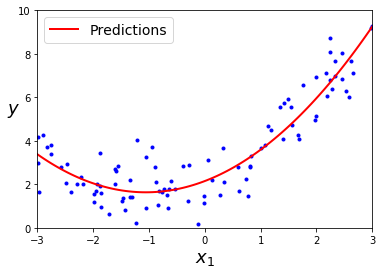

In [17]:
#This way of plotting the line was taken from the solutions 
X_new=np.linspace(-3, 3, 100).reshape(100, 1) 
X_new_poly = poly_features.transform(X_new) #Transform the datapoints 
y_new = lin_reg.predict(X_new_poly) #to get the points it will run thru we must predict
plt.plot(X, y, "b.")#The scattered data
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")#The polynomial line
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- **Note**: When there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

- **Warning**: PolynomialFeatures(degree=d) transforms an array containing n features into an array containing (n + d)! / d!n! features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

# Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, Figure 4-14 applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

![Figure 4-14](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0414.png)

This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. **If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting.**

**If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.**

Another way to tell is to look at the **learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model:

In [18]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # Gives a location to the legend. 
    plt.xlabel("Training set size", fontsize=14) # Labels the x axis 
    plt.ylabel("RMSE", fontsize=14)              # Labels the y axis. 

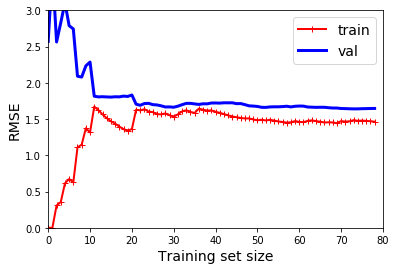

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         #Zooms in on the  plot
#save_fig("underfitting_learning_curves_plot")  
plt.show()    

This model that’s underfitting deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

**These learning curves(The ones above) are typical of a model that’s underfitting**. Both curves have reached a plateau; they are close and fairly high.

- **TIP**: If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data



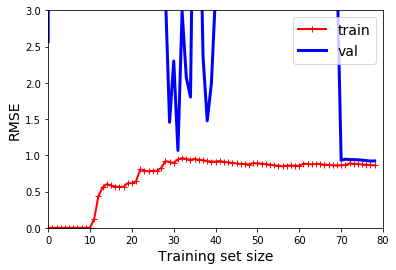

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # Zooms in on the picture. 
#save_fig("learning_curves_plot")  
plt.show()   

[These learning curves](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0416.png) look a bit like the previous ones, but there are two very important differences:

- The error on the training data is much lower than with the Linear Regression model.

- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

-**TIP**: One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

# THE BIAS/VARIANCE TRADE-OFF

An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

- Bias:

This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

- Variance:

This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

- Irreducible error: 

This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.

# Regularized Linear Models

As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

# Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^{n} \theta_{i}{ }^{2}$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

- **NOTE**: It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. For example, classifiers are often trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha$ = 0, then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean. Equation 4-8(the one below) presents the Ridge Regression cost function

$J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+\alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}{ }^{2}$

Note that the bias term $\theta_0$ is not regularized (the sum starts at i = 1, not 0). If we define w as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is equal to$\frac{1}{2}( \|w\|_2)^2$ , where $∥\|w\|_2$ represents the $ℓ_2$ norm of the weight vector For Gradient Descent, just add $\alpha w$ to the MSE gradient vector

- **WARNING**: It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

The below figure shows several Ridge models trained on some linear data using different $\alpha$ values. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

![The effects of alpha on ridge regression](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0417.png)

As with Linear Regression, we can perform Ridge Regression either by computing a [closed-form](https://mathworld.wolfram.com/Closed-FormSolution.html#:~:text=An%20equation%20is%20said%20to,not%20be%20considered%20closed%2Dform.) equation or by performing Gradient Descent. The pros and cons are the same. The below equation shows the closed-form solution, where A is the (n + 1) × (n + 1) identity matrix,11 except with a 0 in the top-left cell, corresponding to the bias term.

$$
\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{\boldsymbol{\top}} \mathbf{X}+\alpha \mathbf{A}\right)^{-1} \mathbf{X}^{\top} \mathbf{y}
$$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of Equation 4-9 that uses a matrix factorization technique by André-Louis Cholesky):

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.99427756]])

In [22]:
#Using gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.98915521])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge Regression.

# Lasso Regression

_Least Absolute Shrinkage and Selection Operator Regression_ (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

$$
J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+\alpha \sum_{i=1}^{n}\left|\theta_{i}\right|
$$

Modeling with Lasso regression below.Figure 4-18
![Figure 4-18](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0418.png)

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). For example, the dashed line in the righthand plot in Figure 4-18 (with α = 10-7) looks roughly cubic: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).


You can get a sense of why this is the case by looking at Figure 4-19: the axes represent two model parameters, and the background contours represent different loss functions. In the top-left plot, the contours represent the ℓ1 loss (|θ1| + |θ2|), which drops linearly as you get closer to any axis. For example, if you initialize the model parameters to θ1 = 2 and θ2 = 0.5, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); therefore θ2 will reach 0 first (since it was closer to 0 to begin with). After that, Gradient Descent will roll down the gutter until it reaches θ1 = 0 (with a bit of bouncing around, since the gradients of ℓ1 never get close to 0: they are either –1 or 1 for each parameter). In the top-right plot, the contours represent Lasso’s cost function (i.e., an MSE cost function plus an ℓ1 loss). The small white circles show the path that Gradient Descent takes to optimize some model parameters that were initialized around θ1 = 0.25 and θ2 = –1: notice once again how the path quickly reaches θ2 = 0, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). If we increased α, the global optimum would move left along the dashed yellow line, while if we decreased α, the global optimum would move right (in this example, the optimal parameters for the unregularized MSE are θ1 = 2 and θ2 = 0.5).

Figure 4-19
![Figure 4-19](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0419.png)

The two bottom plots show the same thing but with an ℓ2 penalty instead. In the bottom-left plot, you can see that the ℓ2 loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. In the bottom-right plot, the contours represent Ridge Regression’s cost function (i.e., an MSE cost function plus an ℓ2 loss). There are two main differences with Lasso. First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down, which helps convergence (as there is no bouncing around). Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase α, but they never get eliminated entirely.

- **Tip**: To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

The Lasso cost function is not differentiable at $θ_i$ = 0 (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector **g** instead when any $θ_i$ = 0. Equation 4-11 shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function.

$$
g(\boldsymbol{\theta}, J)=\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})+\alpha\left(\begin{array}{c}
\operatorname{sign}\left(\theta_{1}\right) \\
\operatorname{sign}\left(\theta_{2}\right) \\
\vdots \\
\operatorname{sign}\left(\theta_{n}\right)
\end{array}\right) \text { where } \operatorname{sign}\left(\theta_{i}\right)=\left\{\begin{array}{cc}
-1 & \text { if } \theta_{i}<0 \\
0 & \text { if } \theta_{i}=0 \\
+1 & \text { if } \theta_{i}>0
\end{array}\right.
$$

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # we could also use SGDRegressor(penalty="l1")
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.94527781])

# Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

Elastic Net Cost Function: 
$$
J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+r \alpha \sum_{i=1}^{n}\left|\theta_{i}\right|+\frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}{ }^{2}
$$

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r):

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.94737068])

# Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure 4-20 shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

![Early stopping](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0420.png)

- **Tip**: With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

Here is a basic implementation of early stopping:

In [25]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# prepare the data
"""
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
#They didn't give us training data, it is strictly an 
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
# Note that with warm_start=True, when the fit() method is called 
# it continues training where it left off, instead of restarting from scratch.
"""

'\npoly_scaler = Pipeline([\n        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),\n        ("std_scaler", StandardScaler())\n    ])\n#They didn\'t give us training data, it is strictly an \nX_train_poly_scaled = poly_scaler.fit_transform(X_train)\nX_val_poly_scaled = poly_scaler.transform(X_val)\n\nsgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,\n                       penalty=None, learning_rate="constant", eta0=0.0005)\n\nminimum_val_error = float("inf")\nbest_epoch = None\nbest_model = None\nfor epoch in range(1000):\n    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off\n    y_val_predict = sgd_reg.predict(X_val_poly_scaled)\n    val_error = mean_squared_error(y_val, y_val_predict)\n    if val_error < minimum_val_error:\n        minimum_val_error = val_error\n        best_epoch = epoch\n        best_model = deepcopy(sgd_reg)\n# Note that with warm_start=True, when the fit() method is called \n# it continues training

# Logistic Regression

As we discussed in Chapter 1, some regression algorithms can be used for classification (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

## Estimating Probabilities

So how does Logistic Regression work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result (see Equation 4-13).

Logistic Regression model estimated probability 
$$
\hat{p}=h_{\boldsymbol{\theta}}(\mathbf{x})=\sigma\left(\boldsymbol{\theta}^{\boldsymbol{\top}} \mathbf{x}\right)
$$

The logistic—noted $\sigma(·)$—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. It is defined as shown in Equation 4-14 and Figure 4-21.

Logistic function
$$
\sigma(t)=\frac{1}{1+\exp (-t)}
$$


![Logistic Function Curve ](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0421.png)

Once the Logistic Regression model has estimated the probability $\hat{p} = h_θ(x)$ that an instance x belongs to the positive class, it can make its prediction ŷ easily

- **NOTE**: The score t is often called the logit. The name comes from the fact that the logit function, defined as logit(p) = log(p / (1 – p)), is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability p, you will find that the result is t. The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

# Training and Cost Function

Now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This idea is captured by the cost function shown in Equation 4-16 for a single training instance x.

Equation 4-16. Cost function of a single training instance
$$
c(\boldsymbol{\theta})=\left\{\begin{array}{cc}
-\log (\hat{p}) & \text { if } y=1 \\
-\log (1-\hat{p}) & \text { if } y=0
\end{array}\right.
$$

This cost function makes sense because –log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, –log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the log loss, shown below

Equation 4-17. Logistic Regression cost function (log loss)
$$
J(\boldsymbol{\theta})=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-\hat{p}^{(i)}\right)\right]
$$

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost function with regard to the jth model parameter θj are given  below.

$$
\frac{\partial}{\partial \theta_{j}} \mathrm{~J}(\boldsymbol{\theta})=\frac{1}{m} \sum_{i=1}^{m}\left(\sigma\left(\boldsymbol{\theta}^{\boldsymbol{\top}} \mathbf{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$

This equation looks very much like Equation 4-5: for each instance it computes the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm. That’s it: you now know how to train a Logistic Regression model. For Stochastic GD you would take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

# Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica

![Flowers](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0422.png)

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [27]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)

In [28]:
#Now we train a model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

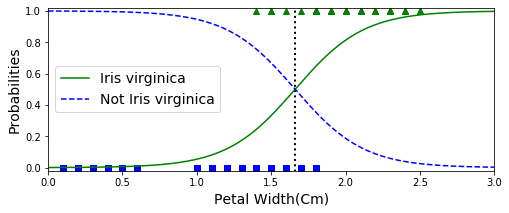

In [29]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 3))#Decide the figure size first. 


#Deciding line
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
#must be declared before the xlabel, legend, etc. 

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty
plt.xlabel("Petal Width(Cm)", fontsize=14)
plt.ylabel("Probabilities", fontsize=14)
plt.legend(loc = 'center left', fontsize=14)


plt.axis([0, 3, -0.02, 1.02]) # Zooom in 
plt.show()

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident):

In [31]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure 4-24 shows the same dataset, but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary.16 Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model.

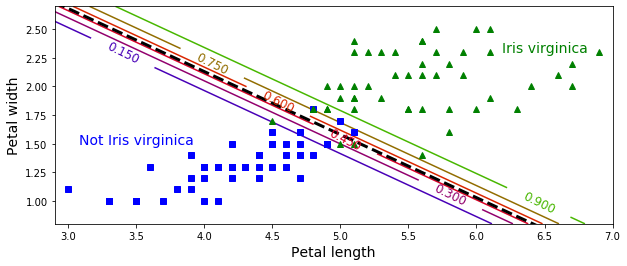

In [34]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( #Return coordinate matrices from coordinate vectors.
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()] #.ravel: Returns a contiguous flattened array. 
#.c_ is concate 

y_proba = log_reg.predict_proba(X_new) 

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
# contour and contourf draw contour lines and filled contours, respectively. 
#Except as noted, function signatures and return values are the same for both versions.


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3) #the center dashed line
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

Just like the other linear models, Logistic Regression models can be regularized using $ℓ_1$ or $ℓ_2$ penalties. Scikit-Learn actually adds an $ℓ_2$ penalty by default.

- Note: The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

# Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers (as discussed in Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is simple: when given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(x)$ should look familiar, as it is just like the equation for Linear Regression prediction

Softmax score

$$
s_{k}(\mathbf{x})=\left(\boldsymbol{\theta}^{(k)}\right)^{\top} \mathbf{x}
$$

Note that each class has its own dedicated parameter vector $\theta(k)$. All these vectors are typically stored as rows in a parameter matrix $\theta$.

Once you have computed the score of every class for the instance $x$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function (Equation 4-20). The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Eqn-20 Softmax function
$$
\hat{p}_{k}=\sigma(\mathbf{s}(\mathbf{x}))_{k}=\frac{\exp \left(s_{k}(\mathbf{x})\right)}{\sum_{j=1}^{K} \exp \left(s_{j}(\mathbf{x})\right)}
$$

In this equation:

- $K$ is the number of classes
- $ s(x)$ is a vector containing the scores of each class for the instance $x$
- $\sigma(\mathbf{s}(\mathbf{x}))_{k}$ is the estimated probability that the instance x beongs to the class $k$, given the scores for each class for that instance. 

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in Equation 4-21.

Eqn 4-21 
$$
\hat{y}=\underset{k}{\operatorname{argmax}} \sigma(\mathbf{s}(\mathbf{x}))_{k}=\underset{k}{\operatorname{argmax}} s_{k}(\mathbf{x})=\underset{k}{\operatorname{argmax}}\left(\left(\boldsymbol{\theta}^{(k)}\right)^{\top} \mathbf{x}\right)
$$

The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability $\sigma{(s(x))_k}$.

- **Tip**:  The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown in Equation 4-22, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

4-22 Cross entropy cost function
$$
J(\boldsymbol{\Theta})=-\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \log \left(\hat{p}_{k}^{(i)}\right)
$$

In this equation:

- $y^{(i)}_k$ is the target probability that the $i^{th}$ instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes $(K = 2)$, this cost function is equivalent to the Logistic Regression’s cost function (log loss; see Equation 4-17).

- **CROSS ENTROPY**: Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight options (sunny, rainy, etc.), you could encode each option using three bits because 23 = 8. However, if you think it will be sunny almost every day, it would be much more efficient to code “sunny” on just one bit (0) and the other seven options on four bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross entropy will be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumptions are wrong (e.g., if it rains often), cross entropy will be greater by an amount called the Kullback–Leibler (KL) divergence.

The cross entropy between two probability distributions p and q is defined as H(p,q) = —Σx p(x) log q(x) (at least when the distributions are discrete). For more details, check out my video on the subject.


The gradient vector of this cost function with regard to $\theta(k)$ is given by Equation 4-23.

Equation 4-23. Cross entropy gradient vector for class k
$$
\nabla_{\boldsymbol{\theta}^{(k)}} J(\boldsymbol{\Theta})=\frac{1}{m} \sum_{i=1}^{m}\left(\hat{p}_{k}^{(i)}-y_{k}^{(i)}\right) \mathbf{x}^{(i)}
$$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\theta$ that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies $ℓ_2$ regularization by default, which you can control using the hyperparameter C:

In [35]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
softmax_reg.predict([[5, 2]])

array([2])

In [37]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Figure 4-25 shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear. The figure also shows the probabilities for the Iris versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

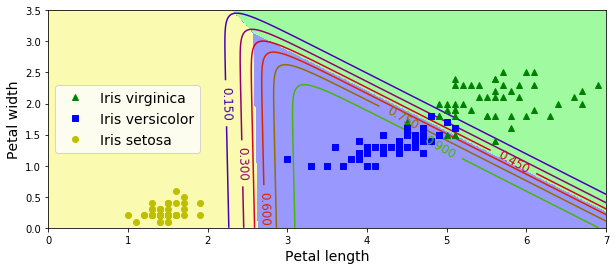

In [41]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()